In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc, os ,sys
gc.collect()

Using TensorFlow backend.


0

In [51]:
## load mtfs
n_up = 16
n_down = 16 #32

folder = "/work/work_teamEXOPLANET/"
MTF_data = np.load(folder+'/MTF_margarita/no_invertidos/MTF_u%d_d%d.npy'%(n_up,n_down))  
TIME_data = np.load(folder+'/MTF_gabo/npys/MTF_time_u%d_d%d.npy'%(n_up,n_down))  

#folder = "/media/fmena/Respaldo/KOI_LC/MTF/"
#MTF_data = np.load(folder+'/normal/MTF_u%d_d%d.npy'%(n_up,n_down))  
#TIME_data = np.load(folder+'/time/MTF_time_u%d_d%d.npy'%(n_up,n_down))  

x_all = []
for i in range(MTF_data.shape[0]):
    combined_image = np.dstack((MTF_data[i],TIME_data[i]))
    x_all.append(combined_image)
x_all = np.asarray(x_all)
x_all.shape

(8054, 32, 32, 2)

In [52]:
fold = "../../KOI_Data/"
df_sets = pd.read_csv(fold+"/koi_sets.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values


df_meta = pd.read_csv(fold+"/koi_metadata.csv")
df_meta_train = df_meta[mask_train]
df_meta_test = df_meta[mask_test]
df_meta_unb = df_meta[mask_unlabeled]

df_meta_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
7,K07622.01,FALSE POSITIVE,NaN,36.267167,155.081300,2454988.081,0.214,2.06500,627.1,0.022,...,4264.0,4.637,-0.20,0.620,0.607,3.016,7.472,10.0,1,39
9,K00998.01,FALSE POSITIVE,NaN,161.788327,214.039000,2455047.039,0.267,5.31000,87750.0,0.273,...,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1,9
10,K00992.01,CONFIRMED,Kepler-745 b,9.931463,136.491280,2454969.491,0.037,5.67800,398.6,0.018,...,5782.0,4.280,0.16,1.220,1.035,4.530,22.901,26.2,2,137


In [53]:
labels_train = df_meta_train['NExScI Disposition'].values
labels_val = df_meta_test['NExScI Disposition'].values

y_train =  (labels_train =="CONFIRMED")*1
y_val =  (labels_val =="CONFIRMED")*1

x_train = x_all[mask_train]
x_val = x_all[mask_test]

print ("Objetos de entrenamiento:",x_train.shape, y_train.shape)
print ("Objetos de validación:",x_val.shape,y_val.shape)

Objetos de entrenamiento: (4339, 32, 32, 2) (4339,)
Objetos de validación: (1918, 32, 32, 2) (1918,)


In [54]:
### load model
model = keras.models.load_model("./models/MTF_elmejor76.hdf5")
#
#model = keras.models.load_model("./models/16u_32d_N.h5")

model.summary()

KeyError: 0

In [24]:
probas_all = model.predict(x_all)[:,0]

class_v = ["CONFIRMED" if value >=0.5 else "FALSE POSITIVE" for value in probas_all]
df_res = pd.DataFrame({"KOI Name": df_meta["KOI Name"].values,  "Predicted Disposition": class_v,
                      "Probability": probas_all,})
df_res

,KOI Name,Predicted Disposition,Probability
0,K00889.01,CONFIRMED,9.978492e-01
1,K01009.01,FALSE POSITIVE,3.410890e-01
2,K07621.01,FALSE POSITIVE,6.303290e-02
3,K06252.01,FALSE POSITIVE,0.000000e+00
4,K00958.01,FALSE POSITIVE,4.073185e-02
5,K00984.01,CONFIRMED,7.954221e-01
6,K04162.01,FALSE POSITIVE,4.629325e-01
7,K07622.01,CONFIRMED,5.101159e-01
8,K00994.01,FALSE POSITIVE,2.290894e-01
9,K00998.01,FALSE POSITIVE,8.940697e-08


In [25]:
df_res.to_csv("best_model_pred/pred.csv", index=False)

In [55]:
df_res = pd.read_csv("best_model_pred/pred.csv")
probas_all = df_res["Probability"].values

probas_train = probas_all[mask_train]
probas_val = probas_all[mask_test]
df_res.head()

,KOI Name,Predicted Disposition,Probability
0,K00889.01,CONFIRMED,0.997849
1,K01009.01,FALSE POSITIVE,0.341089
2,K07621.01,FALSE POSITIVE,0.063033
3,K06252.01,FALSE POSITIVE,0.000000
4,K00958.01,FALSE POSITIVE,0.040732


,Precision raw,Recall raw,F1 raw,F1 weighted,F1 macro,F1 micro
False Positive,0.833072,0.852446,0.842648,0.791917,0.770143,0.793014
Confirmed,0.713396,0.682563,0.697639,0.791917,0.770143,0.793014


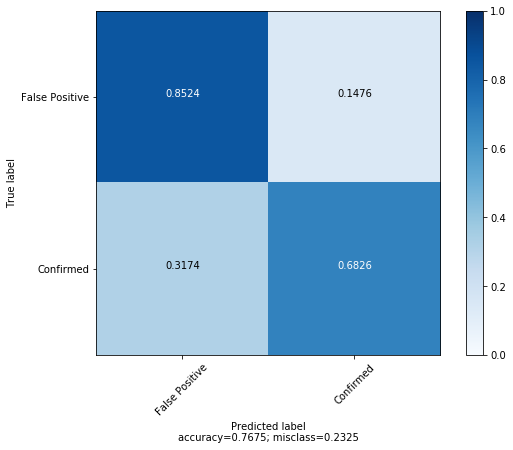

Done


In [56]:
### confusion matrix

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from evaluation import calculate_metrics, plot_ROC

y_val_hat = (probas_val >= 0.5)*1
calculate_metrics(y_val, y_val_hat ,'Confusion Matrix') 
print("Done")

In [57]:
def rank_diff(probas, value=0.5):
    probas = probas.flatten()
    print(probas)
    print(value)
    distance = np.square(probas - value)
    return np.argsort(distance)#, np.sort(distance)

## visualize several MTFS
from matplotlib.colors import LogNorm

def visualize_MTF(n_values, MTFS, PROBAS, labels, n=5, title=""):
    n_idx = np.random.choice(n_values, size=n, replace=False)
    
    f, axx = plt.subplots(1, n, figsize=(15,3))
    for i, i_dx in enumerate(n_idx):
        axx[i].imshow(MTFS[i_dx], cmap='RdPu', norm=LogNorm() )
        axx[i].set_title("Probability %.3f "%( PROBAS[i_dx]))
        axx[i].set_xlabel("Object %s"%labels[i_dx])
        axx[i].set_xticks([])
        axx[i].set_yticks([])
        
    f.suptitle(title)
    plt.show()

### DIfficult data (closer to 0.5)

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
0.5


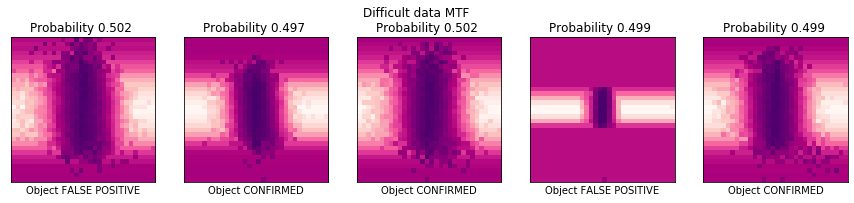

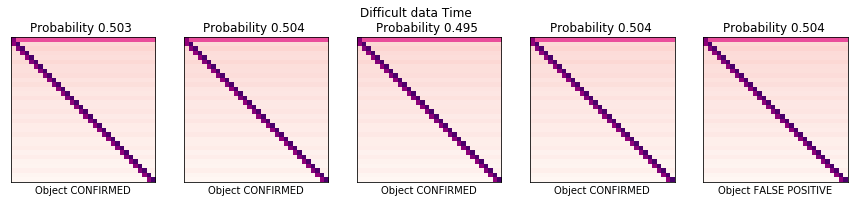

In [104]:
rank_V = rank_diff(probas_train)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### Confidence data (away from 0.5)

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
0.5


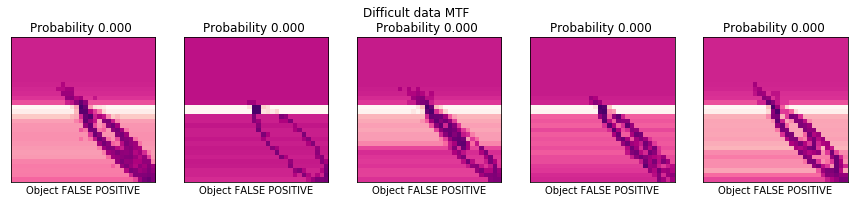

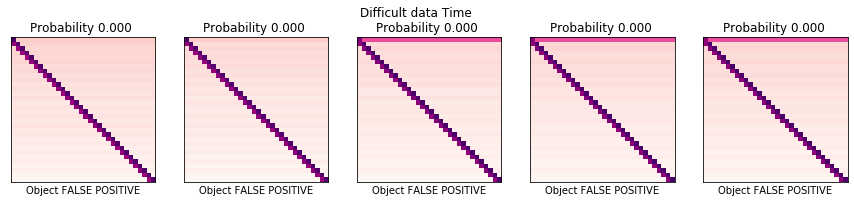

In [86]:
rank_V = rank_diff(probas_train)[::-1][:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### Data confidence confirmed (close to 1)

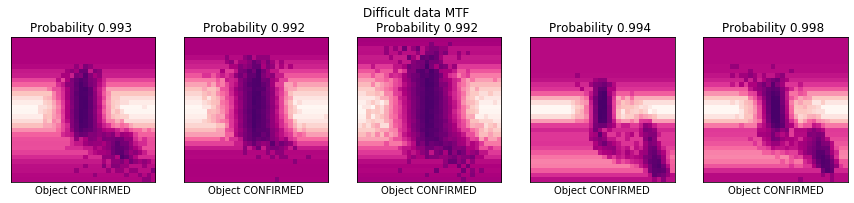

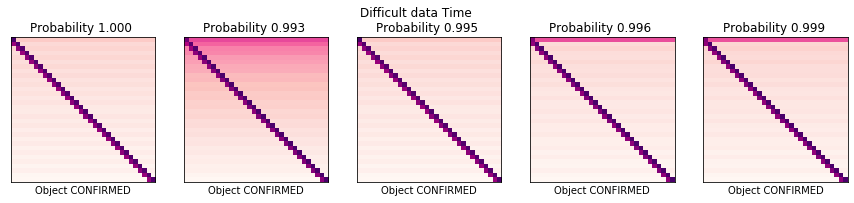

In [55]:
rank_V = rank_diff(probas_train, value=1)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
1


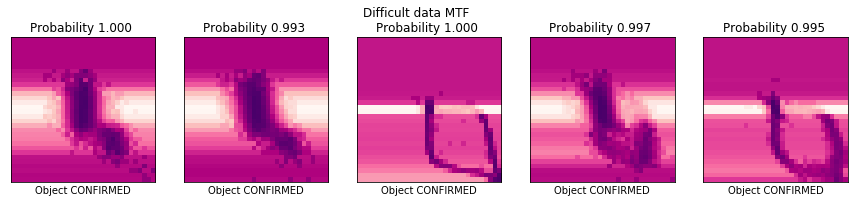

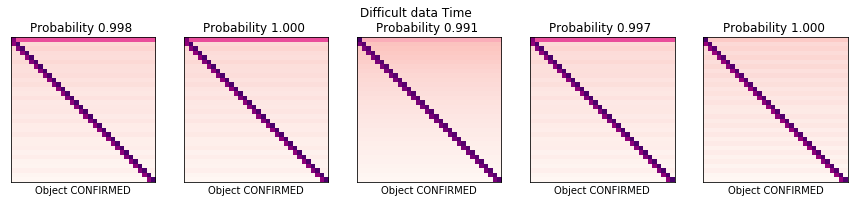

In [85]:
rank_V = rank_diff(probas_train, value=1)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### Data confidence False positive (close to 0)

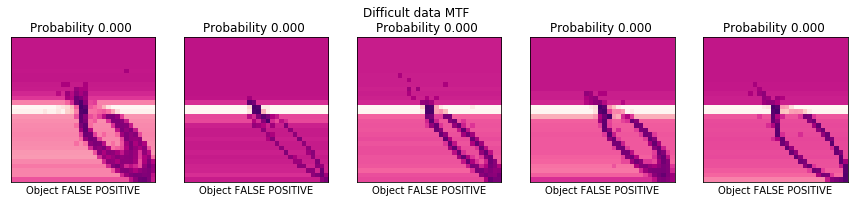

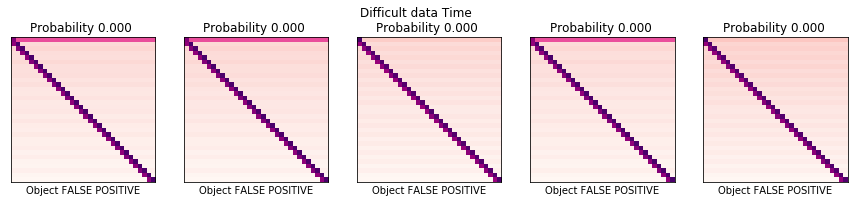

In [56]:
rank_V = rank_diff(probas_train, value=0)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

[0.9903121  0.41954175 0.45724502 ... 0.50523525 0.47363836 0.47873908]
0


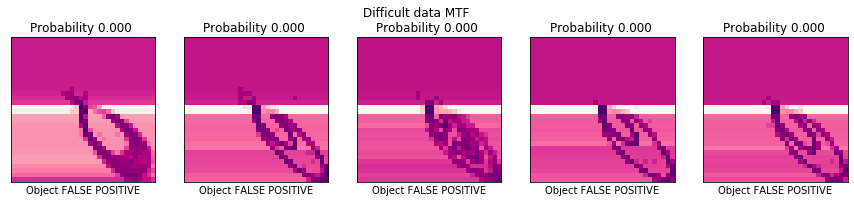

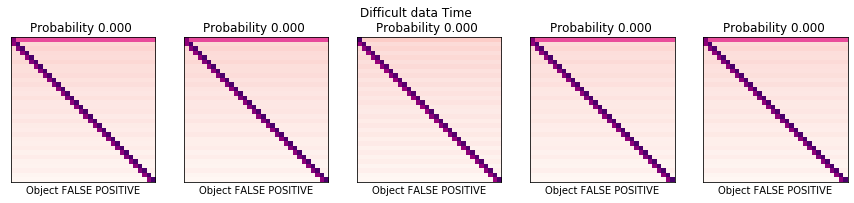

In [42]:
rank_V = rank_diff(probas_train, value=0)[:100]

visualize_MTF(rank_V, MTF_data[mask_train], probas_train, labels_train, title="Difficult data MTF")
visualize_MTF(rank_V, TIME_data[mask_train], probas_train, labels_train, title="Difficult data Time")

### CONF MTFS

In [103]:
def perf_measure(y_actual, y_hat):
    TP = []
    FP = []
    TN = []
    FN = []

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP.append(i)
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP.append(i)
        if y_actual[i]==y_hat[i]==0:
            TN.append(i)
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN.append(i)

    return(np.asarray(TP), np.asarray(FP), np.asarray(TN), np.asarray(FN))

def sort_list_prob(idx, prob):
    return idx[np.argsort(prob[idx])[::-1]]

y_hat_val = (probas_val>=0.5)*1
y_hat_val

array([0, 0, 0, ..., 0, 1, 1])

In [100]:
np.sort(probas_all)

array([0.        , 0.        , 0.        , ..., 0.9999988 , 0.99999964,
       1.        ])

In [105]:
TP, FP, TN, FN = perf_measure(y_val, y_hat_val)

In [113]:
def set_images(img, ref, idx):
    img_ex = len(idx)
    size = ref.shape[-1]
    for i in range(int(img_ex/2)):
        for j in range(int(img_ex/2)):
            img[size*(i): size*(i+1), size*(j): size*(j+1)] = ref[idx[i+j]]

def plot_images_v2(ref, idx):
    img_ex = len(idx)
    fig, axx = plt.subplots(int(img_ex/2), int(img_ex/2), figsize=(10,10))

    for i in range(int(img_ex/2)):
        for j in range(int(img_ex/2)):
            axx[i,j].imshow(ref[idx_ex[i+j]] , cmap='RdPu', norm=LogNorm() )
            axx[i,j].set_axis_off()

    plt.show()

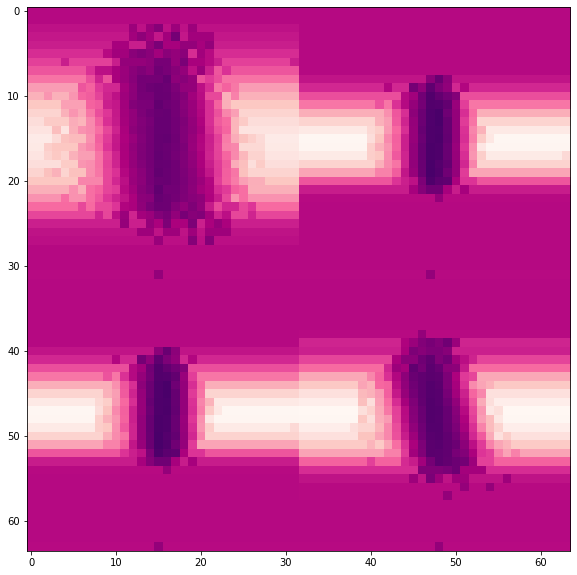

In [114]:
img_ex = 4

sub_img = np.zeros((MTF_data.shape[1]*int(img_ex/2), MTF_data.shape[1]*int(img_ex/2)))


idx_ex = np.random.choice(TP , img_ex, replace=False)

set_images(sub_img, MTF_data, idx_ex)

plt.figure(figsize=(10,10))
plt.imshow(sub_img , cmap='RdPu', norm=LogNorm() )
plt.show()

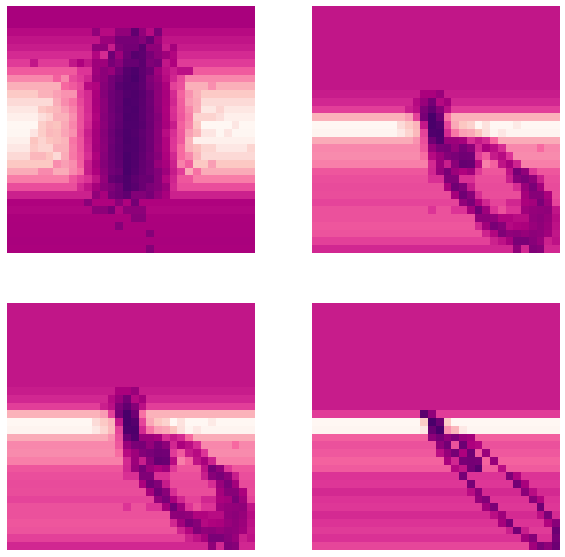

In [87]:
plot_images_v2(MTF_data, idx_ex)

In [73]:
axx[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b7db1fff6a0>,
      dtype=object)

In [88]:
idx_all = 

NameError: name 'idx_all' is not defined

In [ ]:

plot_images_v2(MTF_data, idx_all)

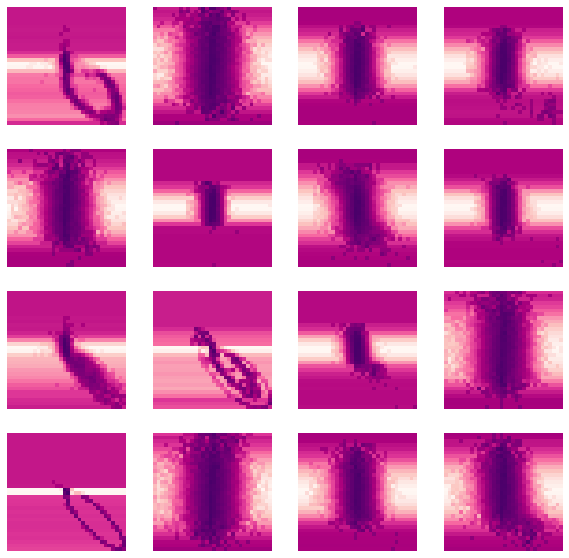

In [97]:
img_ex = 4
fig, axx = plt.subplots(img_ex, img_ex, figsize=(10,10))

#TP
k = 0
idx_ex = np.random.choice(TP , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1
        
#FP
k = 0
idx_ex = np.random.choice(FP , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1

#FN
k = 0
idx_ex = np.random.choice(FN , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1

#TN
k = 0
idx_ex = np.random.choice(TN , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        k +=1


plt.show()

In [115]:
TP = sort_list_prob(TP, probas_val)
FP = sort_list_prob(FP, probas_val)
TN = sort_list_prob(TN, probas_val)
FN = sort_list_prob(FN, probas_val)


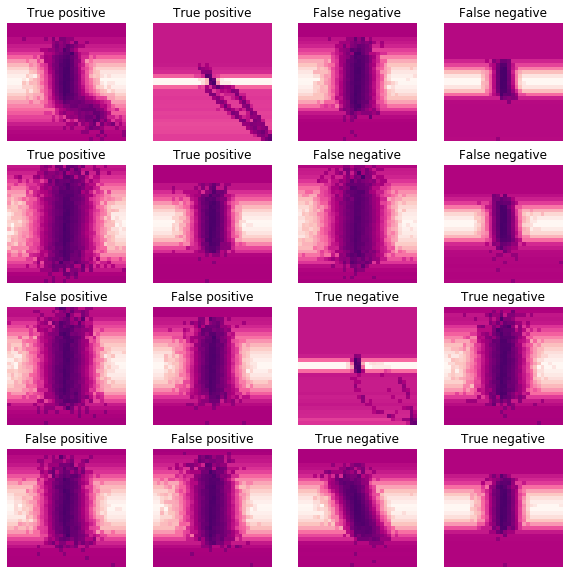

In [133]:
img_ex = 4
fig, axx = plt.subplots(img_ex, img_ex, figsize=(10,10))

#TP
k = 0
idx_ex = np.random.choice(TP[:10] , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("True positive")
        k +=1
        
#FP
k = 0
idx_ex = np.random.choice(FP[:10] , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2)):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("False positive")
        k +=1

#FN
k = 0
idx_ex = np.random.choice(FN[:10] , img_ex, replace=False)
for i in range(int(img_ex/2)):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("False negative")
        k +=1

#TN
k = 0
idx_ex = np.random.choice(TN[:10] , img_ex, replace=False)
for i in range(int(img_ex/2), img_ex):
    for j in range(int(img_ex/2), img_ex):
        axx[i,j].imshow(MTF_data[idx_ex[k]] , cmap='RdPu', norm=LogNorm() )
        axx[i,j].set_axis_off()
        axx[i,j].set_title("True negative")
        k +=1


plt.show()